# Linear Regression Lab

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("housing.csv")
df

,sqft,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [8]:
# Set up our training data
x_train = df['sqft'].to_numpy()
y_train = df['price'].to_numpy()

# To use only a subset of the training data, use a slice of the arrays above.

print("Training data for x: ", x_train)
print("Training data for y: ", y_train)

Training data for x:  [2104 1600 2400 1416 3000 1985 1534 1427 1380 1494 1940 2000 1890 4478
 1268 2300 1320 1236 2609 3031 1767 1888 1604 1962 3890 1100 1458 2526
 2200 2637 1839 1000 2040 3137 1811 1437 1239 2132 4215 2162 1664 2238
 2567 1200  852 1852 1203]
Training data for y:  [399900 329900 369000 232000 539900 299900 314900 198999 212000 242500
 239999 347000 329999 699900 259900 449900 299900 199900 499998 599000
 252900 255000 242900 259900 573900 249900 464500 469000 475000 299900
 349900 169900 314900 579900 285900 249900 229900 345000 549000 287000
 368500 329900 314000 299000 179900 299900 239500]


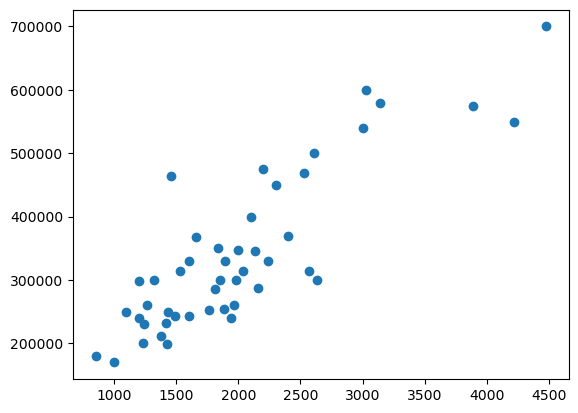

In [9]:
# Make a nice plot

plt.scatter(x_train, y_train)
plt.show()

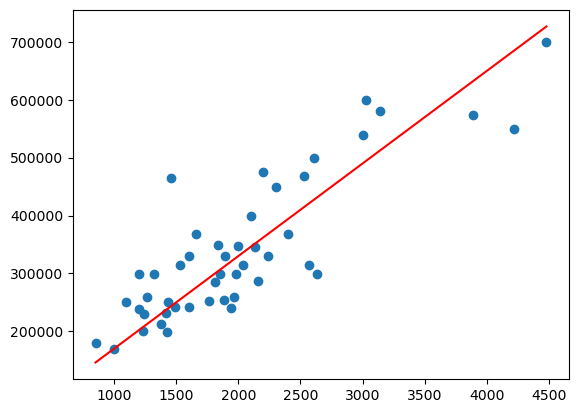

In [10]:
# Make a nice plot with a line based on the equation y = wx + b

plt.scatter(x_train, y_train)

# Set up dummy values for w and b
w = 160
b = 10000
 
# Generate points on our line y = wx + b to graph
line_x_points = np.linspace(min(x_train), max(x_train), 100)
line_y_points = [w * x + b for x in line_x_points]

plt.plot(line_x_points, line_y_points, c='red')
plt.show()

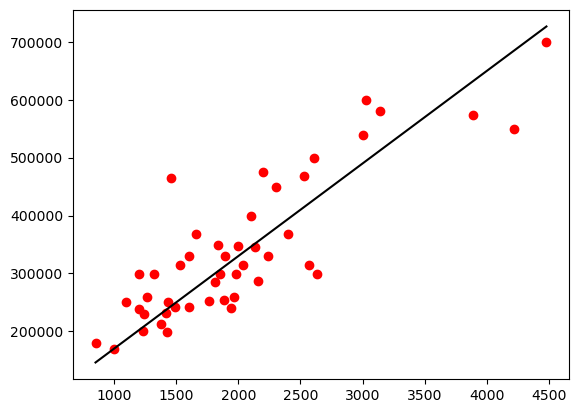

In [11]:
# Let's turn it into a function:

def make_plot(x_train, y_train, w, b):
    plt.scatter(x_train, y_train, c='red')

    line_x_points = np.linspace(min(x_train), max(x_train), 100)
    line_y_points = [w * x + b for x in line_x_points]
    
    plt.plot(line_x_points, line_y_points, c='black')
    plt.show()
    
make_plot(x_train, y_train, 160, 10000)

In [12]:
# Let's define a function to predict y = f(x) = wx + b

def make_prediction(x, w, b):
    return w * x + b
    

In [13]:
# Let's define a function to compute the cost J(w, b) on a set of data:

def compute_cost(x_data, y_data, w, b):
    """
    x_data and y_data are lists
    w and b are scalars
    return: cost
    """
    m = len(x_data)
    total_cost = 0
    for i in range (0, m):
        y = y_data[i] #y[i]
        y_hat = make_prediction(x_data[i], w, b)
        cost = (y_hat - y) ** 2
        total_cost += cost
    return total_cost / (2 * m)

In [14]:
# Output total cost for our data set:

w = 120
b = 100000

print(compute_cost(x_train, y_train, w, b))

2123393642.6276596


In [15]:
# Let's write a function to compute the gradient:

def compute_gradient(x_data, y_data, w, b):
    """
    x_data and y_data are lists
    w and b are scalars
    return: gradient of w, gradient of b
    """
    m = len(x_data)
    gradient_w = 0
    gradient_b = 0
    
    for i in range(0, m):
        x = x_data[i] #x[i]
        y = y_data[i] #y[i]
        y_hat = make_prediction(x_data[i], w, b)
        grad_w = (y_hat - y) * x
        gradient_w += grad_w
        
        grad_b = (y_hat - y)
        gradient_b += grad_b
    return gradient_w / m, gradient_b / m
    
    
    
    
    # CODE HERE

In [77]:
# Let's write code to run gradient descent:

w = 120
b = 10000
ALPHA = .00000001

# CODE HERE

J_list = []
for i in range(0, 5000):
    
    cost = compute_cost(x_train, y_train, w, b)
    '''
    print("Iteration ", i)
    print("w = ", w, "b = ", b)
    print("Current cost: ",cost)
    '''
    J_list.append(cost)
    
    gradient_w, gradient_b = compute_gradient(x_train, y_train, w, b)
    w = w - ALPHA * gradient_w
    b = b - ALPHA * gradient_b
print("Final cost: ", compute_cost(x_train, y_train, w, b))   
print("Final w and b:", w, b)

Final cost:  2309214332.532257
Final w and b: 161.05334124736535 10000.427571090037


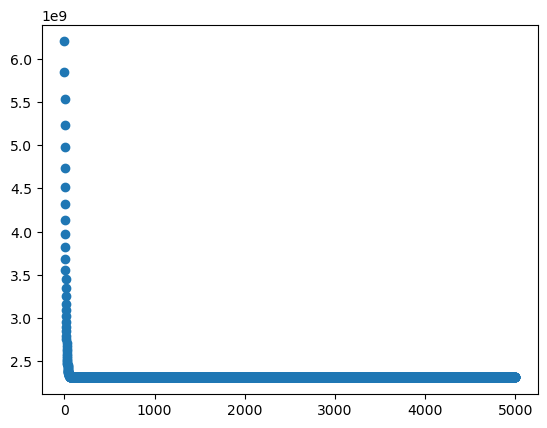

In [78]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_list)), J_list)

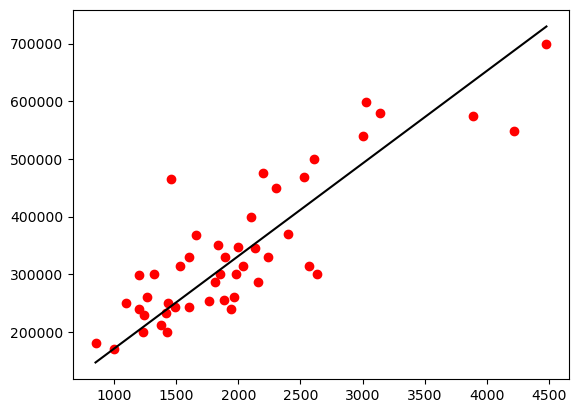

In [63]:
# Produce final plot of our data and our line:

make_plot(x_train, y_train, w, b)

In [74]:
# Make a new prediction:

sqft = 1000
prediction = make_prediction(sqft, w, b)

print("A house with", sqft, "square feet would sell for around", prediction, "dollars.")

A house with 1000 square feet would sell for around 170691.54805334605 dollars.
